In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
pd.set_option("max_rows", 15)
pd.set_option("precision", 4)

# Treat None, Null, INF, -INF as NA
pd.options.mode.use_inf_as_na = True

plt.rcParams["figure.figsize"] = [10, 10]

In [33]:
import os
BASEDIR = os.path.dirname(os.path.dirname(os.path.abspath('README.md')))
DATAPATH = os.path.join(BASEDIR, 'src/data/')

In [34]:
df = pd.read_csv(os.path.join(DATAPATH, 'kaggle_car_ads.csv'))
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [35]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [36]:
{colname : df[col].isna().sum()/len(df)*100 for colname, col in zip(df.columns,df.columns)}

{'maker': 14.605343447853478,
 'model': 31.899495399829775,
 'mileage': 10.205262612752582,
 'manufacture_year': 10.430261149164403,
 'engine_displacement': 20.924075800357567,
 'engine_power': 15.617527256515217,
 'body_type': 31.605454905722404,
 'color_slug': 94.10340025308818,
 'stk_year': 48.07763322029929,
 'transmission': 20.87386346748808,
 'door_count': 17.29209729934206,
 'seat_count': 21.095062303822893,
 'fuel_type': 52.002582670215304,
 'date_created': 0.0,
 'date_last_seen': 0.0,
 'price_eur': 0.0}

<AxesSubplot:>

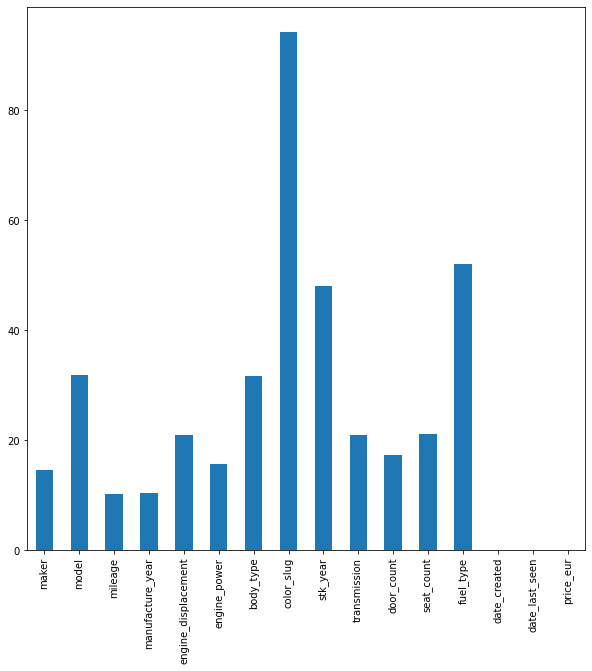

In [37]:
(df.isnull().sum()/len(df)*100).plot.bar()

In [38]:
reduced_df = df.loc[:,df.isna().sum()/len(df)*100 < 40]

reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           object 
 9   seat_count           object 
 10  date_created         object 
 11  date_last_seen       object 
 12  price_eur            float64
dtypes: float64(5), object(8)
memory usage: 352.4+ MB


In [39]:
"""Column Type Change
to_numeric()
astype()
inferobjects()
convert_dtypes()
"""
reduced_df["manufacture_year"]= pd.to_datetime(reduced_df["manufacture_year"], format = '%Y', errors='coerce')


In [40]:
reduced_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011-01-01,2000.0,103.0,NaN,man,5,7,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012-01-01,2000.0,81.0,NaN,man,5,5,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010-01-01,1995.0,85.0,NaN,man,5,5,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004-01-01,1200.0,47.0,NaN,man,5,5,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004-01-01,1200.0,47.0,NaN,man,5,5,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3552907,skoda,roomster,54000.0,2013-01-01,1200.0,63.0,other,NaN,NaN,NaN,2017-03-16 18:57:35.46558+00,2017-03-16 18:57:35.46558+00,1295.34
3552908,skoda,felicia,NaN,2000-01-01,NaN,50.0,other,NaN,NaN,NaN,2017-03-16 18:57:37.761349+00,2017-03-16 18:57:37.761349+00,1295.34
3552909,skoda,octavia,230000.0,2006-01-01,1900.0,100.0,other,NaN,NaN,NaN,2017-03-16 18:57:40.435847+00,2017-03-16 18:57:40.435847+00,1295.34
3552910,skoda,fabia,NaN,2001-01-01,NaN,NaN,other,NaN,NaN,NaN,2017-03-16 18:57:43.595523+00,2017-03-16 18:57:43.595523+00,1295.34


In [41]:
reduced_df['door_count'].replace('None', np.nan, inplace=True)
reduced_df['seat_count'].replace('None', np.nan, inplace=True)

reduced_df["seat_count"] = reduced_df["seat_count"].astype(np.float64)
reduced_df["door_count"] = reduced_df["seat_count"].astype(np.float64)


In [42]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   maker                object        
 1   model                object        
 2   mileage              float64       
 3   manufacture_year     datetime64[ns]
 4   engine_displacement  float64       
 5   engine_power         float64       
 6   body_type            object        
 7   transmission         object        
 8   door_count           float64       
 9   seat_count           float64       
 10  date_created         object        
 11  date_last_seen       object        
 12  price_eur            float64       
dtypes: datetime64[ns](1), float64(6), object(6)
memory usage: 352.4+ MB


In [43]:
categorical_variables = [item for item in reduced_df.columns if reduced_df[item].dtype == "object"]

numeric_variables = [item for item in reduced_df.columns if reduced_df[item].dtype == "float64"]

In [44]:
print(categorical_variables)

print(numeric_variables)

['maker', 'model', 'body_type', 'transmission', 'date_created', 'date_last_seen']
['mileage', 'engine_displacement', 'engine_power', 'door_count', 'seat_count', 'price_eur']


In [45]:
reduced_df = reduced_df.drop(["date_created","date_last_seen"], axis = 1)
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   maker                object        
 1   model                object        
 2   mileage              float64       
 3   manufacture_year     datetime64[ns]
 4   engine_displacement  float64       
 5   engine_power         float64       
 6   body_type            object        
 7   transmission         object        
 8   door_count           float64       
 9   seat_count           float64       
 10  price_eur            float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 298.2+ MB


In [46]:
print(reduced_df.isna().sum())

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        397477
engine_displacement     743414
engine_power            554877
body_type              1122914
transmission            741630
door_count             1287099
seat_count             1287099
price_eur                    0
dtype: int64


In [47]:
reduced_df.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011-01-01,2000.0,103.0,NaN,man,7.0,7.0,10584.75
1,skoda,octavia,143476.0,2012-01-01,2000.0,81.0,NaN,man,5.0,5.0,8882.31
2,bmw,NaN,97676.0,2010-01-01,1995.0,85.0,NaN,man,5.0,5.0,12065.06
3,skoda,fabia,111970.0,2004-01-01,1200.0,47.0,NaN,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004-01-01,1200.0,47.0,NaN,man,5.0,5.0,2738.71
5,skoda,fabia,140932.0,2003-01-01,1200.0,40.0,NaN,man,5.0,5.0,1628.42
6,skoda,fabia,167220.0,2001-01-01,1400.0,74.0,NaN,man,5.0,5.0,2072.54
7,bmw,NaN,148500.0,2009-01-01,2000.0,130.0,NaN,auto,5.0,5.0,10547.74
8,skoda,octavia,105389.0,2003-01-01,1900.0,81.0,NaN,man,5.0,5.0,4293.12
9,NaN,NaN,301381.0,2002-01-01,1900.0,88.0,NaN,man,5.0,5.0,1332.35


<AxesSubplot:>

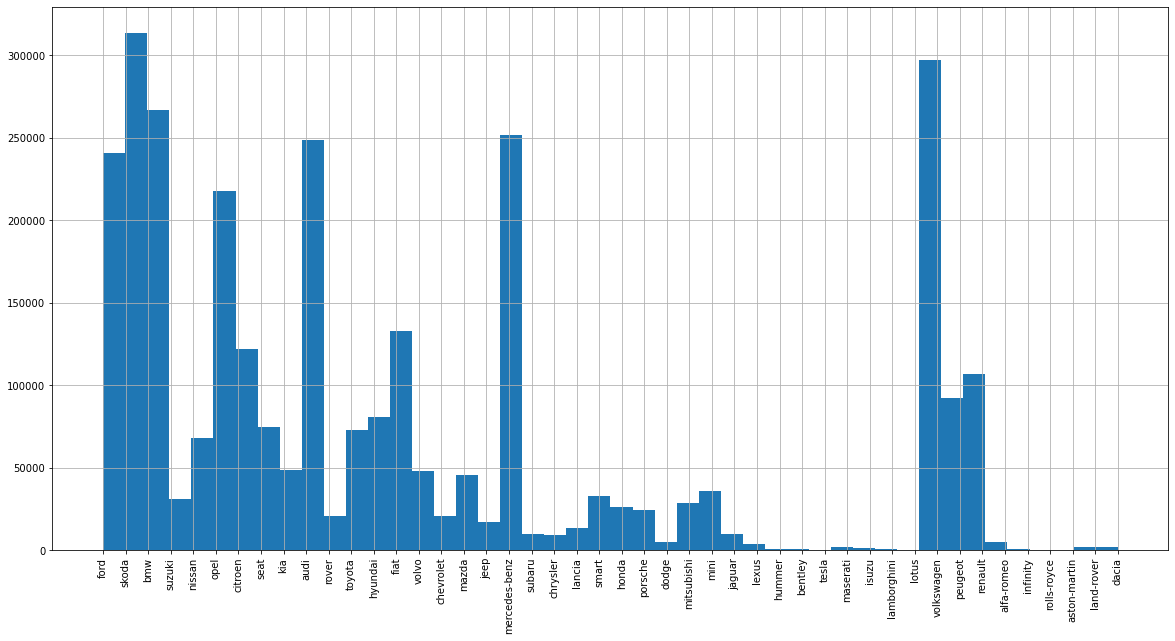

In [48]:

reduced_df["maker"].hist(bins = 46, figsize=(20,10), xrot = 90)

In [49]:
reduced_df["maker"].value_counts()

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
                  ...  
infinity            506
lotus               426
tesla               235
rolls-royce          46
aston-martin         22
Name: maker, Length: 46, dtype: int64

In [50]:
# Total percntage of missing values
reduced_df["maker"].isna().sum()/len(reduced_df)*100

14.605343447853478

In [51]:
reduced_df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'transmission', 'door_count', 'seat_count',
       'price_eur'],
      dtype='object')

In [52]:
# If the advertisement doesnt have Who made it? Car Brand and Mileage of the car,
# that advertisement can be removed as it is of no relevance to us.
reduced_df = reduced_df.loc[(reduced_df["maker"].isna()==False) & (reduced_df["model"].isna()==False) & (reduced_df["mileage"].isna()==False)]

In [53]:
reduced_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011-01-01,2000.0,103.0,NaN,man,7.0,7.0,10584.75
1,skoda,octavia,143476.0,2012-01-01,2000.0,81.0,NaN,man,5.0,5.0,8882.31
3,skoda,fabia,111970.0,2004-01-01,1200.0,47.0,NaN,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004-01-01,1200.0,47.0,NaN,man,5.0,5.0,2738.71
5,skoda,fabia,140932.0,2003-01-01,1200.0,40.0,NaN,man,5.0,5.0,1628.42
...,...,...,...,...,...,...,...,...,...,...,...
3552903,skoda,octavia,0.0,2010-01-01,NaN,NaN,other,man,NaN,NaN,1295.34
3552905,skoda,octavia,272000.0,2004-01-01,2000.0,103.0,other,man,NaN,NaN,1295.34
3552906,skoda,octavia,168000.0,1999-01-01,NaN,NaN,other,NaN,NaN,NaN,1295.34
3552907,skoda,roomster,54000.0,2013-01-01,1200.0,63.0,other,NaN,NaN,NaN,1295.34


In [54]:
print(reduced_df.isna().sum())

maker                       0
model                       0
mileage                     0
manufacture_year       188092
engine_displacement    359745
engine_power           217508
body_type              564590
transmission           340938
door_count             646865
seat_count             646865
price_eur                   0
dtype: int64


<AxesSubplot:>

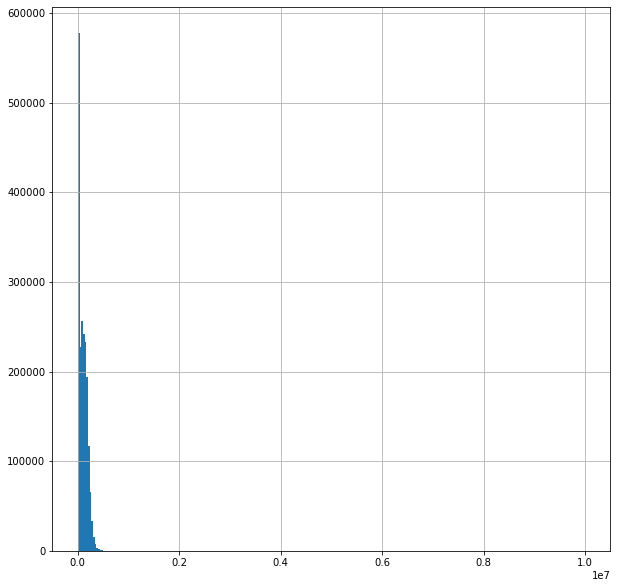

In [92]:
reduced_df["mileage"].hist(bins=300)

In [55]:
reduced_df["manufacture_year"]=reduced_df["manufacture_year"].dt.year

In [56]:
# Cars manufactured before 2000 A.D. are not considered

reduced_df = reduced_df.loc[(reduced_df["manufacture_year"] > 2000) | (reduced_df["manufacture_year"].isna()==False) | (reduced_df["manufacture_year"].isnull()==False)]

<AxesSubplot:>

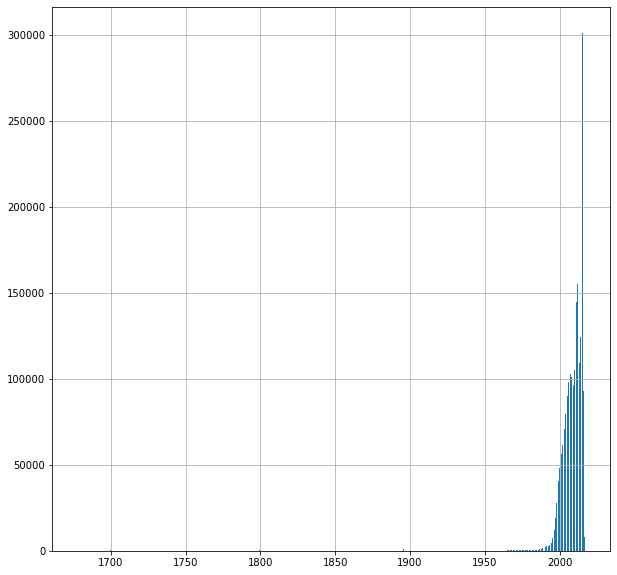

In [84]:
reduced_df["manufacture_year"].hist(bins=500)

In [58]:
reduced_df.isna().sum()

maker                       0
model                       0
mileage                     0
manufacture_year            0
engine_displacement    313910
engine_power           188300
body_type              525185
transmission           311375
door_count             561038
seat_count             561038
price_eur                   0
dtype: int64

In [59]:
reduced_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,7.0,7.0,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5.0,5.0,8882.31
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5.0,5.0,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,man,5.0,5.0,1628.42
...,...,...,...,...,...,...,...,...,...,...,...
3552903,skoda,octavia,0.0,2010.0,NaN,NaN,other,man,NaN,NaN,1295.34
3552905,skoda,octavia,272000.0,2004.0,2000.0,103.0,other,man,NaN,NaN,1295.34
3552906,skoda,octavia,168000.0,1999.0,NaN,NaN,other,NaN,NaN,NaN,1295.34
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,1295.34


<AxesSubplot:>

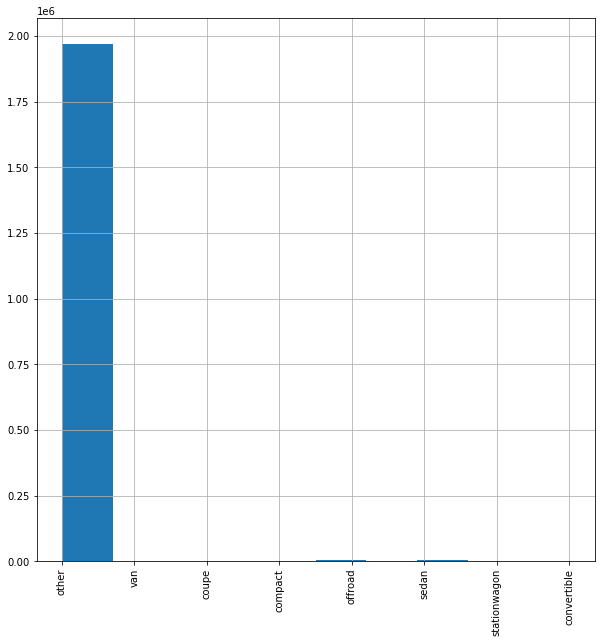

In [86]:
reduced_df["body_type"].hist(bins=10,xrot=90)

In [61]:
#Selecting all the models with registered body type
temp = reduced_df.loc[(reduced_df["body_type"].isna()==False)]
temp = temp[["model","body_type"]].reset_index(drop=True)
temp

,model,body_type
0,viano,van
1,s-max,van
2,matrix,van
3,town-country,van
4,doblo,van
...,...,...
1471027,octavia,other
1471028,octavia,other
1471029,octavia,other
1471030,roomster,other


In [62]:
#Creating a dictionary that contains models as key and body type as value
body_type_dict = {}

grouped = temp.groupby('model')

In [63]:
for group in list(temp["model"].unique()):
    # A model can have multiple bodytype
    # Select the body type that is most repeated in a specific model
    value = grouped.get_group(group)["body_type"].value_counts().sort_values(ascending=False).index[0]
    key = group
    body_type_dict[key]=value

In [64]:
reduced_df.isna().sum()

maker                       0
model                       0
mileage                     0
manufacture_year            0
engine_displacement    313910
engine_power           188300
body_type              525185
transmission           311375
door_count             561038
seat_count             561038
price_eur                   0
dtype: int64

In [65]:
# Changing the nan values of bodytype according to the model
reduced_df ['body_type']= reduced_df['model'].map(body_type_dict)
reduced_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,7.0,7.0,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5.0,5.0,8882.31
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,other,man,5.0,5.0,1628.42
...,...,...,...,...,...,...,...,...,...,...,...
3552903,skoda,octavia,0.0,2010.0,NaN,NaN,other,man,NaN,NaN,1295.34
3552905,skoda,octavia,272000.0,2004.0,2000.0,103.0,other,man,NaN,NaN,1295.34
3552906,skoda,octavia,168000.0,1999.0,NaN,NaN,other,NaN,NaN,NaN,1295.34
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,1295.34


In [66]:
reduced_df.isna().sum()

maker                       0
model                       0
mileage                     0
manufacture_year            0
engine_displacement    313910
engine_power           188300
body_type                   3
transmission           311375
door_count             561038
seat_count             561038
price_eur                   0
dtype: int64

In [67]:
# We still have 3 nan values for body type
# Means we did map three values according to model

reduced_df.loc[reduced_df["body_type"].isna()==True]

# This suggests that we dont have a registered body type for model: armada

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
263209,nissan,armada,30108.0,2010.0,5601.0,233.0,NaN,auto,7.0,7.0,20001.96
521671,nissan,armada,116585.0,2004.0,5552.0,227.0,NaN,auto,5.0,5.0,11571.87
1243211,nissan,armada,38000.0,2010.0,5700.0,NaN,NaN,auto,NaN,NaN,19900.74


In [68]:
# We dont know the body type of model:armada so we can either remove the instances having model armada
# Or we can assume armada to have the modal body count

# Here we choose to remove the instances with modal: armada
reduced_df = reduced_df.loc[reduced_df["body_type"].isna()==False]

reduced_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,man,7.0,7.0,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,man,5.0,5.0,8882.31
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,man,5.0,5.0,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,other,man,5.0,5.0,1628.42
...,...,...,...,...,...,...,...,...,...,...,...
3552903,skoda,octavia,0.0,2010.0,NaN,NaN,other,man,NaN,NaN,1295.34
3552905,skoda,octavia,272000.0,2004.0,2000.0,103.0,other,man,NaN,NaN,1295.34
3552906,skoda,octavia,168000.0,1999.0,NaN,NaN,other,NaN,NaN,NaN,1295.34
3552907,skoda,roomster,54000.0,2013.0,1200.0,63.0,other,NaN,NaN,NaN,1295.34


In [69]:
reduced_df.isna().sum()

maker                       0
model                       0
mileage                     0
manufacture_year            0
engine_displacement    313910
engine_power           188299
body_type                   0
transmission           311375
door_count             561037
seat_count             561037
price_eur                   0
dtype: int64

In [70]:
reduced_df['transmission'].fillna(reduced_df['transmission'].mode()[0], inplace=True)

In [71]:
# Seems ike we have completed our categorical variables 
# Now moving on to the numeric variables

In [72]:
print(reduced_df.isna().sum() * 100/len(reduced_df))

maker                   0.0000
model                   0.0000
mileage                 0.0000
manufacture_year        0.0000
engine_displacement    15.7253
engine_power            9.4328
body_type               0.0000
transmission            0.0000
door_count             28.1051
seat_count             28.1051
price_eur               0.0000
dtype: float64


In [73]:
reduced_df = reduced_df.drop(reduced_df[reduced_df["door_count"]>=8].index)
reduced_df["door_count"].unique()

array([ 7.,  5.,  4., nan,  2.,  6.,  3.,  1.,  0.])

In [74]:
reduced_df = reduced_df.drop(reduced_df[reduced_df["seat_count"]>=8].index)
reduced_df["seat_count"].unique()

array([ 7.,  5.,  4., nan,  2.,  6.,  3.,  1.,  0.])

In [75]:
reduced_df['door_count'] = reduced_df['door_count'].fillna(reduced_df['door_count'].mode()[0])
reduced_df['seat_count'] = reduced_df['seat_count'].fillna(reduced_df['seat_count'].mode()[0])


In [76]:
reduced_df.isna().sum()

maker                       0
model                       0
mileage                     0
manufacture_year            0
engine_displacement    313625
engine_power           188208
body_type                   0
transmission                0
door_count                  0
seat_count                  0
price_eur                   0
dtype: int64

In [77]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985494 entries, 0 to 3552909
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   transmission         object 
 8   door_count           float64
 9   seat_count           float64
 10  price_eur            float64
dtypes: float64(7), object(4)
memory usage: 261.8+ MB


<AxesSubplot:>

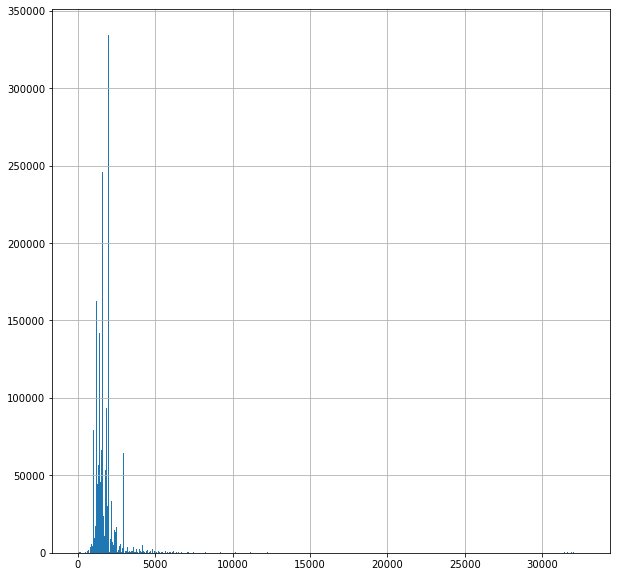

In [78]:
reduced_df["engine_displacement"].hist(bins=500)

<AxesSubplot:>

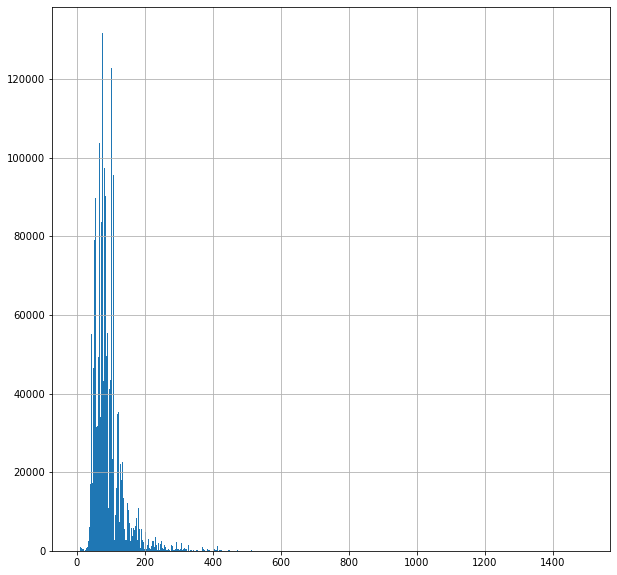

In [79]:
reduced_df["engine_power"].hist(bins=500)

In [80]:
reduced_df["engine_power"].describe().astype(int)

count    1797286
mean          92
std           45
min            3
25%           66
50%           81
75%          105
max         1495
Name: engine_power, dtype: int64

In [81]:
categorical_variables = [item for item in reduced_df.columns if reduced_df[item].dtype == "object"]

numeric_variables = [item for item in reduced_df.columns if reduced_df[item].dtype != "object"]

In [82]:
numeric_variables

['mileage',
 'manufacture_year',
 'engine_displacement',
 'engine_power',
 'door_count',
 'seat_count',
 'price_eur']

In [83]:
categorical_variables

['maker', 'model', 'body_type', 'transmission']

In [88]:
reduced_df["price_eur"].describe()

count    1.9855e+06
mean     4.2574e+04
std      2.1175e+07
min      4.0000e-02
25%      1.2953e+03
50%      6.9000e+03
75%      1.4599e+04
max      1.4922e+10
Name: price_eur, dtype: float64

<AxesSubplot:xlabel='price_eur', ylabel='Density'>

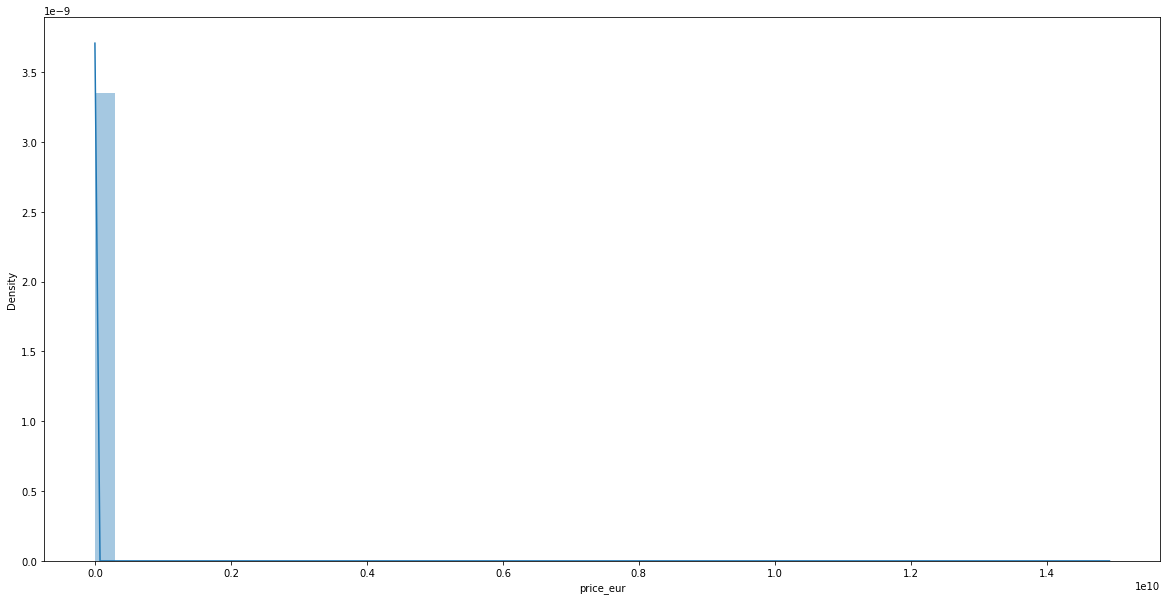

In [87]:
import seaborn as sns

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.distplot(reduced_df["price_eur"])